# Week1 One-way ANOVA
## 背景描述
为了调查吃巧克力对心血管健康的影响，实验由三种类型的巧克力组成：100g的黑巧克力，含有200mg全脂牛奶的100g黑巧克力和200g的牛奶巧克力。12个实验对象：7女5男。在不同的天数里，每个实验对象将吃一种类型的巧克力，一个小时后测量他们血浆的总抗氧能力。 
这是一个因子水平数 𝑎 = 3 和重复次数 𝑛 = 12 的单因子实验。


## 数据描述
实验次序本身具有随机性，无需再随机化

| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Chocolate | 巧克力类型 | categorical variable | [1, 2, 3] |
| （因变量）Capacity | 血浆浓度 | continuous variable | Real |


In [1]:
import pandas as pd
print('Randomized test sequence: \n', pd.read_csv('project1.csv').values)

Randomized test sequence: 
 [[  1.    1.  118.8]
 [  2.    1.  122.6]
 [  3.    1.  115.6]
 [  4.    1.  113.6]
 [  5.    1.  119.5]
 [  6.    1.  115.9]
 [  7.    1.  115.8]
 [  8.    1.  115.1]
 [  9.    1.  116.9]
 [ 10.    1.  115.4]
 [ 11.    1.  115.6]
 [ 12.    1.  107.9]
 [  1.    2.  105.4]
 [  2.    2.  101.1]
 [  3.    2.  102.7]
 [  4.    2.   97.1]
 [  5.    2.  101.9]
 [  6.    2.   98.9]
 [  7.    2.  100. ]
 [  8.    2.   99.8]
 [  9.    2.  102.6]
 [ 10.    2.  100.9]
 [ 11.    2.  104.5]
 [ 12.    2.   93.5]
 [  1.    3.  102.1]
 [  2.    3.  105.8]
 [  3.    3.   99.6]
 [  4.    3.  102.7]
 [  5.    3.   98.8]
 [  6.    3.  100.9]
 [  7.    3.  102.8]
 [  8.    3.   98.7]
 [  9.    3.   94.7]
 [ 10.    3.   97.8]
 [ 11.    3.   99.7]
 [ 12.    3.   98.6]]


## 问题 
注：这里使用 $\alpha=0.05$ 的显著性水平

1. 试判断食用的 3 种巧克力对心血管健康的影响是否有差异.
2. 试判断该实验用One-way ANOVA模型是否恰当.
3. 估计食用这 3 种巧克力 1h 后血浆的总抗氧能力均值和误差的方差.
4. 若Q1判断存在差异，请进行多重比较.

## 解决方案
**Q1:**  
检验假设 $H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$ ; vs $H_1: \mu_1, \mu_2, \mu_3, \mu_4$不全相等；

在本问题中，采用单因子方差分析模型（One-way ANOVA模型）对问题进行分析。计算得出方差分析表，然后计算出检验统计量F。若$F\ge F_{1-\alpha}(f_A,f_e)$，说明$H_0$成立，因子不显著；否则说明$H_0$不成立，说明因子显著。其中$f_A,f_e$分别为因子和误差的自由度。

利用python进行分析得到的具体分析结果如下：

In [2]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f

alpha = 0.05
a = 3
n = 12 # 与课上讲的符号有差异，课上使用m
x = pd.read_csv('project1.csv')
data = x.values[:,1:3] # data为去除序号之后的数据

# Sort them into groups, according to column 1("Chocolate")
group1 = data[data[:,0] == 1,1]
group2 = data[data[:,0] == 2,1]
group3 = data[data[:,0] == 3,1]
# print(group1)

# Do the one-way ANOVA
df = pd.DataFrame(data, columns = ['Chocolate', 'Capacity'])   
model = ols('Capacity ~ C(Chocolate)', df).fit()
anovaResults = round(anova_lm(model), 2) # 计算方差分析表，保留两位小数
print('The ANOVA table: \n', anovaResults)  

F0, pVal1 = stats.f_oneway(group1, group2, group3)
# 法1：
# pVal1为ｐ值
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2：
# （使用书上符号）dfn=f_A=r-1, dfd=n-r=f_e=r(m-1)
F = round(f.ppf(0.95,dfn = a-1,dfd = a*n-a), 2)
if F0 > F:
    print('Since F0 > F(0.05,2,33) = ', F, ', reject H0.')
else:
    print('Accept H0.') 

The ANOVA table: 
                 df   sum_sq  mean_sq      F  PR(>F)
C(Chocolate)   2.0  1952.64   976.32  93.58     0.0
Residual      33.0   344.31    10.43    NaN     NaN

Since p-value < 0.05, reject H0.
Since F0 > F(0.05,2,33) =  3.28 , reject H0.


由方差分析表可知，P值小于 0.05 且F值大于 3.28，落入拒绝域$W=\{F\ge F_{1-\alpha}(f_A,f_e)\}$中，故拒绝原假设$H_0$，说明因子显著。即食用的 3 种巧克力对心血管健康的影响有差异.。

**Q2:**  
ANOVA模型： 
$y_{ij} = \mu + \tau_i + \epsilon_{ij}$ 的误差服从正态独立分布，其均值为零，方差为未知的常数$\sigma^2$。 
想要判断ANOVA模型是否恰当，可以利用残差检测来进行分析。  
处理 $i$ 的观测值 $j$ 的残差定义为：$e_{ij} = y_{ij} - \hat{y}_{ij}$  
其中$\hat{y}_{ij}$是对应于$y_{ij}$的一个估计， 
$\hat{y}_{ij} = \hat{\mu} + \hat{\tau}_i = \overline{y}_{··} + (\overline{y}_{i·} - \overline{y}_{··}) = \overline{y}_{i·}$  
  
**1. 独立性检验**  
由于题目中的数据不是按照一定时间顺序收集的，无法画出残差的时序图，故无法利用残差图检测残差之间的相关性。

利用Durbin-Watson检验，又称DW检验来做独立性检验。是用来检验分析中残差的一阶自相关性的。  
各残差的相关性方程为：$e_i = \rho * e_{i-1} + v_i$，检验的原假设为：$\rho = 0$，备择假设为：$\rho \neq 0$  
检验统计量为：$d = \frac{\sum^T_{t=2}\quad(e_i-e_{i-1})^2}{\sum^T_{t=1}\quad e_i^2}$  
该统计量值越接近 2 越好，一般在 1~3 之间说明没问题，小于 1 这说明残差存在自相关性（有临界值表可以查）。  
文献参考：https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic

In [3]:
# 计算抗氧能力的残差
data_res = data.astype(float) * 1
list_power = [1, 2, 3]
for k in list_power:
    cnt = data_res[data_res[:,0] == k,1]
    data_res[data_res[:,0] == k,1] = cnt - np.mean(cnt)

# 用Durbin-Watson检验进行独立性检验
def durbin_watson(residuals):
    nume = sum(np.diff(residuals.T) ** 2)
    deno = sum(residuals ** 2)
    return nume / deno
res = data_res[:, 1]
dw = durbin_watson(res)
print('Durbin-Watson检验的统计量为：', round(dw,2))

Durbin-Watson检验的统计量为： 2.3


由分析可知，Durbin-Watson检验的统计量为：2.3，在 1~3 之间且非常接近2 ，故没有违反独立性的假定。  
  
**2. 方差齐性检验** 

在进行方差分析时要求r个方差相等，这称为方差齐性。方差齐性检验的原假设和备择假设分别如下：
$H_0:\sigma_1^2=\sigma_2^2=...=\sigma_r^2\  vs\  H_1:诸\sigma_i^2不全相等$.

【法1】Bartlett检验的核心思想是通过求取不同组之间的卡方统计量，然后根据卡方统计量的值来判断组间方差是否相等。该方法极度依赖于数据是正态分布，如果数据非正态分布，则的出来的结果偏差很大。  
Bartlett检验统计量为：$\chi_0^2 = 2.3026\frac{q}{c}$  
其中，$q = (N - a)log_{10}S_p^2 - \sum_{i=1}^a(n_i - 1)log_{10}S_i^2$  
$c = 1 + \frac{1}{3(a-1)}(\sum_{i=1}^a(n_i-1)^{-1} - (N - a)^{-1})$  
$S_p^2 = \frac{\sum_{i=1}^a\quad(n_i-1)S_i^2}{N - a}$ 且$S_i^2$是第 $i$ 个总体的样本方差；当$\chi_0^2 > \chi_{\alpha,a-1}^2$ 时，拒绝$H_0$，其中$\chi_{\alpha,a-1}^2$是自由度为$a-1$的卡方分布上的 $\alpha$ 分位数。

In [4]:
# 用Bartlett检验进行方差齐性检验
bart, pVal2 = stats.bartlett(group1, group2, group3)
bart_stat = stats.chi2.isf(alpha, a-1)

# 法1：
print('Bartlett检验的P值为：', round(pVal2, 2))
if pVal2 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  

# 法2：
print('Bartlett检验统计量：', round(bart, 2))
print('𝜒_(𝛼,𝑎−1)^2: ', round(bart_stat, 2))
if bart > bart_stat:
    print('Since 𝜒_0^2 > 𝜒_(𝛼,𝑎−1)^2, reject H0.')
else:
    print('Accept H0') 

Bartlett检验的P值为： 0.81
Accept H0
Bartlett检验统计量： 0.42
𝜒_(𝛼,𝑎−1)^2:  5.99
Accept H0


由分析可知，Bartlett检验的P值大于 0.05 且Bartlett检验统计量小于 7.81，故接受原假设，即残差具有方差齐性。  
  
【法2】Levene检验是将每个值先转换为该值与其组内均值的偏离程度，然后再用转换后的偏离程度去做方差分析，即组间方差/组内方差。修正后的Levene检验中的均值采用中位数的计算方法，因此这里的偏差用每个处理的观测值$y_{ij}$与该处理中的中位数$\tilde{y}_{i·}$的偏差的绝对值来表示：$d_{ij} = |y_{ij} - \tilde{y}_{i·}|, i = 1,2,···,a;j = 1,2,···,n$

In [5]:
# 用Levene检验进行方差齐性检验
lene, pVal3 = stats.levene(group1, group2, group3)
print('Levene检验的P值为：', round(pVal3, 2))
if pVal3 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  
   

Levene检验的P值为： 0.98
Accept H0


由分析可知，Levene检验的P值大于 0.05，故残差具有方差齐性。

**3. 正态性检验**  

正态性检验用于判断总体分布是否为正态分布。其检验假设$H_0:总体分布符合正态分布\  vs\  H_1:总体分布不符合正态分布$.
【法1】利用qq图（The quantitle-quantile plot），来检验数据分布的相似性。令X轴为正态分布的分位数，Y轴为样本分位数，如果这两者构成的点分布在一条直线上，就证明样本数据与正态分布存在线性相关性，即服从正态分布。

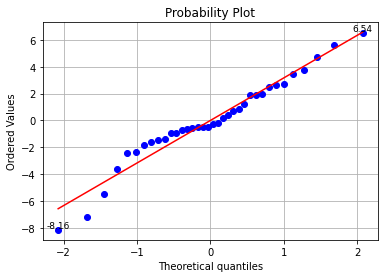

[-8.15833333 -7.2        -5.48333333 -3.6        -2.45833333 -2.38333333
 -1.8        -1.58333333 -1.48333333 -1.38333333 -0.95833333 -0.9
 -0.7        -0.65833333 -0.58333333 -0.48333333 -0.45833333 -0.45833333
 -0.25833333 -0.15833333  0.2         0.4         0.71666667  0.84166667
  1.2         1.9         1.91666667  2.          2.51666667  2.61666667
  2.74166667  3.44166667  3.8         4.7         5.61666667  6.54166667]


In [6]:
# 用qq图进行正态性检验
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x1 = osm[0][0]
y1 = osm[1][0]
plt.text(x1, y1, '%.2f' % float(y1), ha = 'center', va = 'bottom',fontsize = 9)
x2 = osm[0][-1]
y2 = osm[1][-1]
plt.text(x2, y2, '%.2f' % float(y2), ha = 'center', va = 'bottom',fontsize = 9)
plt.grid()
plt.show()

print(osm[1])

由上图可以看出，总体上来看，误差分布是近似正态的；qq图在右边基本符合一条直线，在左边先稍有上翘，稍向下弯曲。这意味着误差分布的左侧的尾部比起正态分布的尾部要更厚一些；也就是说，最大的残差出现在小于的一侧，且大于期望的值。
检测异常值的方法：  
计算标准化残差：$d_{ij} = \frac{e_{ij}}{\sqrt{MS_E}}$。一般地，标准化残差约 68% 落在 ±1 之内，约 95% 落在 ±2 之内，几乎全部落在 ±3 之内。标准化残差的绝对值大于3的残差是一个可能的异常值。  
由上述公式得 $d_1 = \frac{e_1}{\sqrt{MS_E}} = \frac{8.158}{\sqrt{10.43}} = 2.526 < 3$，说明无明显的异常值，即残差是服从正态分布的。
  
【法2】利用Shapiro-Wilk检验来做正态性检验，其原假设：样本数据符合正态分布。（注：适用于小样本）  
利用方法stats.shapiro()检验正态性，输出结果中第一个为统计量，第二个为P值（统计量越接近 1 越表明数据和正态分布拟合的好，P值大于指定的显著性水平，接受原假设，认为样本来自服从正态分布的总体）

In [7]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal4 = stats.shapiro(res)
print(round(SW, 2))
print(round(pVal4, 2))

if pVal4 > alpha:
    print('\nAccept the null hypothesis.')
else:
    print('\nSince p-value > 0.05, reject the null null hypothesis') 

0.96
0.26

Accept the null hypothesis.


由上述分析可知，统计量为 0.96，接近 1；且P值为 0.26，大于指定的显著性水平 0.05。故认为残差来自服从正态分布的总体。  

**Q3:**  
由题意，使用点估计对参数${\mu}_{i}$和$\sigma^2$进行估计。由课上所学内容可知，使用最大似然估计的方法，可以得到其点估计为$\hat{\mu}_{i}=\overline{y}_{i·},\ \hat\sigma^2=MS_e$。利用python计算如下。

In [8]:
# Estimation of Parameter(𝜎2 and 𝜇𝑖 )
mu_1 = np.mean(group1)
mu_2 = np.mean(group2)
mu_3 = np.mean(group3)

mu = [mu_1, mu_2, mu_3]

sse = 0
for i in range(a):
    se = 0
    power_list = data[data[:,0] == (i + 1),1]
    for j in range(n):
        se += (power_list[j] - mu[i]) ** 2
    sse += se
var = round(sse / (a * (n - 1)),2) 
print('Estimate of the population mean：{0}'.format(mu))
print('An estimate of the population variance：{0}'.format(var))

Estimate of the population mean：[116.05833333333334, 100.7, 100.18333333333332]
An estimate of the population variance：10.43


由上述分析可知，3 种巧克力对应的血浆的总抗氧能力均值的估计值分别为：116.1, 100.7, 100.2  
其方差的估计值为：10.43

**Q4:**  
由Q1的分析可知，3 种巧克力对应的血浆的总抗氧能力存在显著性差异，故进行多重比较。这里采用Fisher最小显著性差异（LSD）方法。  
检验：$H_0: \mu_i = \mu_j$ vs $H_1: \mu_i \neq \mu_j$  
检验统计量：$t_0 = \frac{\overline{y}_{i·} - \overline{y}_{j·}}{\sqrt{MS_E·2/n}}$  
当$|\overline{y}_{i·} - \overline{y}_{j·}| > t_{\frac{\alpha}{2},N-a}\sqrt{MS_E·2/n}$时，拒绝原假设，可表明均值对$\mu_i$与$\mu_j$有显著性差异。

In [9]:
#LSD(least significant difference)最小显著差异
def LSD():   
    df = a * (n-1)
    t_value = stats.t(df).isf(alpha / 2)    
    mse = var
    lsd = t_value * math.sqrt(2.0 * mse / n)
    # print(lsd)
    return lsd

for i in range(a):
    for j in range(i + 1,a):
        dist = round(abs(mu[i] - mu[j]), 1)
        print('The difference between group', i + 1, 'and group', j + 1, ': ', dist)
print('Value of LSD: ', round(LSD(),2))
        
cmp = 0
for s in range(a):
    for t in range(s + 1, a):
        lsd = LSD()
        dist = round(abs(mu[s] - mu[t]), 1)
        if(dist < lsd):
            print('No difference between group', s + 1, 'and group', t + 1, ': ')
            cmp += 1
if(cmp == 0):
    print('Reject H0, and there is significant difference in the mean value of any two treatments')




The difference between group 1 and group 2 :  15.4
The difference between group 1 and group 3 :  15.9
The difference between group 2 and group 3 :  0.5
Value of LSD:  2.68
No difference between group 2 and group 3 : 


由于LSD临界值小于group1和2，group1和3的两种处理均值的差，故拒绝原假设，认为group1和2，group1和3的均值存在显著性差异。
对于group2和3，LSD临界值大于两种处理均值的差，故接受原假设，即group2和3的均值不存在显著性差异。

## Week1 作业
（1）考虑单因子方差分析:$a=4, m=6, SS_T=10, SS_E=2.5$。写出方差分析表。 

解：

$$
SS_A=SS_T-SS_E=10-2.5=7.5,\ n=a\times m=4\times 6=24,\ f_A=a-1=3, f_e=n-a=20,\\
f_T=n-1=23,\ MS_A=\frac{SS_A}{f_A}=7.5\div 3=2.5,\ MS_e=\frac{SS_E}{f_e}=2.5\div 20=0.125,\\
F=\frac{MS_A}{MS_e}=\frac{2.5}{0.125}=20,\ Y\sim F(f_A,f_e),\ p=P(Y\ge F)=3.102\times 10^{-6}
$$
ANOVA Table:

| 来源 | 平方和(SS) | 自由度(f) | 均方(MS) | 检验统计量(F) | p值  |
| ---- | ---------- | --------- | -------- | ------------- | ---- |
| 因子 | 7.5        | 3         | 2.5      | 20            |3.102e-06      |
| 误差 | 2.5        | 20        | 0.125    |               |      |
| 总和 | 10         | 23        |          |               |      |

（2）二样本时，A方法$x_1,x_2,...,x_m$，B方法$y_1,y_2,...,y_m$。证明在平衡设计，因子水平为$a=2$时，One-way ANOVA等价于二样本t检验。

解：

由题意，若进行单因子方差分析或二样本t检验，均需有以下假设：1.$x\sim N(\mu_x,\sigma_x^2),y\sim N(\mu_y,\sigma_y^2)$；2.$\sigma_x^2=\sigma_y^2=\sigma^2$；3.所有试验结果均相互独立。

两种方法均检验$H_0:\mu_x-\mu_y=0\ vs\ H_0:\mu_x-\mu_y\ne0$。记$\overline x=\Sigma_{i=1}^m x_i,\overline y=\Sigma_{i=1}^m y_i$。
令总均值$\mu=\frac{\overline x+\overline y}2$，
总偏差平方和$S_T=\Sigma_{i=1}^m(x_i-\mu)^2+\Sigma_{i=1}^m(y_i-\mu)^2$，
组内偏差平方和$S_e=\Sigma_{i=1}^m(x_i-\overline x)^2+\Sigma_{i=1}^m(y_i-\overline y)^2$，
组间偏差平方和$S_A=m[(\overline x-\mu)^2+(\overline y-\mu)^2]$，
合方差$s_w^2=\frac1{2m-2}[\Sigma_{i=1}^m(x_i-\overline x)^2+\Sigma_{i=1}^m(y_i-\overline y)^2]=\frac{S_e}{2m-2}$。

则单因子方差分析的检验统计量$F=\frac{MS_A}{MS_e}=\frac{S_A/(2-1)}{S_e/2m-2}=\frac{2(m-1)S_A}{S_e}$，二样本t检验的检验统计量$t=\frac{\overline x-\overline y}{s_w\sqrt{\frac1m+\frac1m}}=\sqrt{\frac m2}\frac{\overline x-\overline y}{s_w}$。其中$t\sim t(2m-2),\ F\sim F(1,2m-2)$。
$$
t^2={\frac m2}(\frac{\overline x-\overline y}{s_w})^2=\frac{m(\overline x-\overline y)^2}{2s_w^2}=\frac{m(\overline x-\overline y)^2}{2\frac{S_e}{2m-2}}=\frac{m(m-1)(\overline x-\overline y)^2}{S_e}=\frac{m(m-1)(\overline x-\mu-\overline y+\mu)^2}{S_e}=\frac{m(m-1)(\frac{S_A}m-2(\overline x-\mu)(\overline y-\mu))}{S_e}=\frac{(m-1)({S_A}-2m(\overline x-\mu)(\overline y-\mu))}{S_e}=\frac{(m-1)({S_A}-\frac12m(2\overline x-(\overline x+\overline y))(2\overline y-(\overline x+\overline y)))}{S_e}=\frac{(m-1)({S_A}+\frac12m(\overline x-\overline y)^2)}{S_e}=\frac{(m-1)({S_A}+S_A)}{S_e}=\frac{2(m-1)S_A}{S_e}=F
$$
所以两个检验统计量之间的关系满足$t^2=F$。二样本t检验的拒绝域$W=\{|t|\ge t_{1-\alpha/2}(2m-2)\}$。由t分布性质可知，若$t\sim t(2m-2)$，则$t^2\sim F(1,2m-2)$。因为原先的拒绝域是计算得到的t距离0较大的情况，即t分布的两个尾部，两个尾部的概率和为$\alpha$。在t取平方之后，符合F分布，F分布只取非负值，仅有一个尾部，所以应使落于该尾部的概率为$\alpha$。所以$W=\{t^2\ge F_{1-\alpha}(1,2m-2)\}=\{F\ge F_{1-\alpha}(1,2m-1)\}$。这正是One-way ANOVA中的拒绝域。所以两个检验的拒绝域相同。

二样本t检验的p值为$p=P(|T|\ge|t|)$，其中$T\sim t(2m-2)$，t为上述检验统计量。同理可得$Y=T^2\sim F(1,2m-2),\ p=P(T^2\ge t^2)=P(Y\ge F)$，即One-way ANOVA中的p值。所以两个检验的p值相同。

综上所述，在题目所述情况下，单因子方差分析或和二样本t检验的原假设及备择假设，拒绝域及p值相同，检验统计量具有对应关系，可以相互转化。所以题述情况下两种方法等价。

（3）自学《概率论与数理统计》8.1.6节，数据如右。模型为：$y_{ij}=\mu_i+\epsilon_{ij},\epsilon_{ij}\sim N(0,\sigma^2),i= 1,...,a;j=1,...,m_i$。
问题：1.写出效应模型；2.写出$H_0,H_1$；3.写出ANOVA Table及中间符号的计算公式。

解：

1.令总均值$\mu=\frac1n\Sigma_{i=1}^a m_i\mu_i$，令水平效应$a_i=\mu_i-\mu$。效应模型为
$$ 
\left\{
\begin{aligned}
y_{ij}=\mu+a_i+\epsilon_{ij} \\
\Sigma_{i=1}^a m_ia_i=0 \\
诸\epsilon_{ij}相互独立，且都服从N(0,\sigma^2)
\end{aligned}
\right.
$$

2.$H_0:a_1=a_2=...=a_a=0\quad vs\quad H_1:a_1,a_2,...,a_a不全为0.$

3.
$$
n=\Sigma_{i=1}^a m_i,\ \overline y_{i·}=\frac1{m_i}\Sigma_{j=1}^{m_i}y_{ij},\ \overline y=\frac1n\Sigma_{i=1}^a\Sigma_{j=1}^{m_i}y_{ij},\\
S_A=\Sigma_{i=1}^a{m_i}(\overline y_{i·}-\overline y)^2,\ S_e=\Sigma_{i=1}^a\Sigma_{j=1}^{m_i}(y_{ij}-\overline y_{i·})^2,\ S_T=\Sigma_{i=1}^a\Sigma_{j=1}^{m_i}(y_{ij}-\overline y)^2
$$

ANOVA Table:

| 来源  | 平方和(SS) | 自由度(f) | 均方(MS)               | 检验统计量(F)         | p值           |
| ----- | ---------- | --------- | ---------------------- | --------------------- | ------------- |
| 因子A | $S_A$      | $f_A=a-1$ | $MS_A=\frac{S_A}{f_A}$ | $F=\frac{MS_A}{MS_e}$ | $p=P(Y\ge F)$ |
| 误差e | $S_e$      | $f_e=n-a$ | $MS_e=\frac{S_e}{f_e}$ |                       |               |
| 总和T | $S_T$      | $f_T=n-1$ |                        |                       |               |